In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [10]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [11]:
time_window = 50
time_step = 25
trial_average = 20
n_splits =1000 
group_dict = {0:ss1,1:ss3}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [12]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.setup_data(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.setup_data(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_custom_split(xdata_ori,xdata_color,ydata_ori,ydata_color):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [13]:
interp_ori_to_color = decode_eeg.Interpreter(clfr,subtitle='ori_to_color')
interp_ori_to_color.save_results()

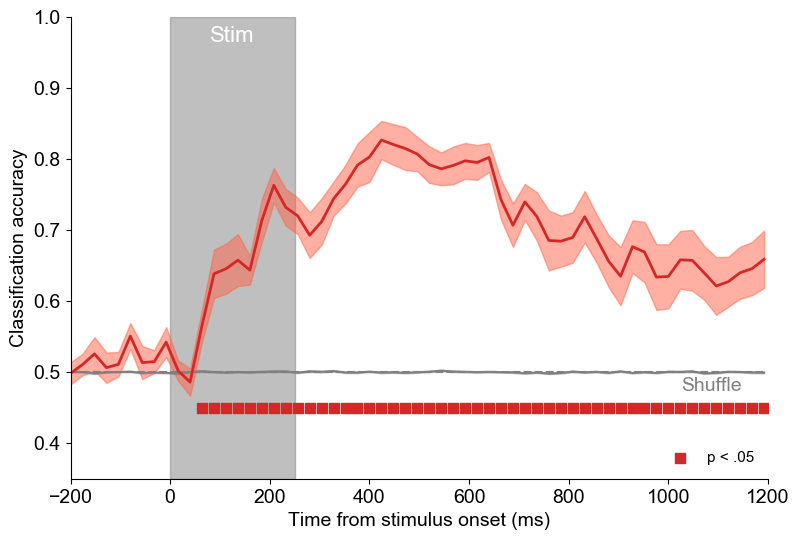

Significant timepoints: [  64   88  112  136  160  184  208  232  256  280  304  328  352  376
  400  424  448  472  496  520  544  568  592  616  640  664  688  712
  736  760  784  808  832  856  880  904  928  952  976 1000 1024 1048
 1072 1096 1120 1144 1168 1192]
Mean delay accuracy: 0.7170589496305768
Mean delay S.D.: 0.06520500191290154


In [19]:
interp_ori_to_color.labels = [1,2]
interp_ori_to_color.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.22)

In [15]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.setup_data(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.setup_data(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_custom_split(xdata_color,xdata_ori,ydata_color,ydata_ori):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

interp_color_to_ori = decode_eeg.Interpreter(clfr,subtitle='color_to_ori')
interp_color_to_ori.save_results()

0


KeyboardInterrupt: 

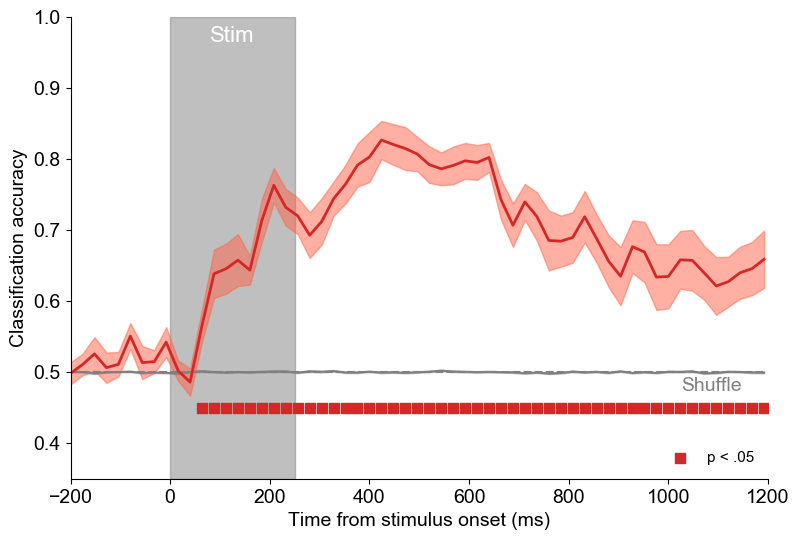

Significant timepoints: [  64   88  112  136  160  184  208  232  256  280  304  328  352  376
  400  424  448  472  496  520  544  568  592  616  640  664  688  712
  736  760  784  808  832  856  880  904  928  952  976 1000 1024 1048
 1072 1096 1120 1144 1168 1192]
Mean delay accuracy: 0.7170589496305768
Mean delay S.D.: 0.06520500191290154


In [17]:
interp_color_to_ori.labels = [1,2]
interp_color_to_ori.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.22)

# within compared to between

In [3]:
interp_color_to_ori = decode_eeg.Interpreter()
interp_color_to_ori.load_results(filename = 'color_to_ori.pickle')
interp_ori_to_color = decode_eeg.Interpreter()
interp_ori_to_color.load_results('ori_to_color.pickle')

interp_color = decode_eeg.Interpreter()
interp_color.load_results('color.pickle')
interp_color.acc = interp_color.acc
interp_color.acc_shuff = interp_color.acc_shuff
interp_ori = decode_eeg.Interpreter()
interp_ori.load_results('ori.pickle')

## color

In [4]:
# Combine acc matrices for plotting
interp_color.acc = np.concatenate([interp_color.acc[:,np.newaxis],interp_ori_to_color.acc[:,np.newaxis]],1)
interp_color.acc_shuff = np.concatenate([interp_color.acc_shuff[:,np.newaxis],interp_ori_to_color.acc_shuff[:,np.newaxis]],1)

In [8]:
interp_color.acc.shape

(17, 2, 59, 1000)

Within-color mean delay accuracy: 0.7199789215686273
Within-color mean delay S.D.: 0.05654272551343025
Orientation-to-color mean delay accuracy: 0.6990514152255105
Orientation-to-color mean delay S.D.: 0.05711633898756263
significant timepoints: []
mean delay accuracy: 0.6990514152255105
mean delay S.D.: 0.05711633898756263
Saving output\figures\accwithin_color_and_ori_to_color.pdf
Saving output\figures\accwithin_color_and_ori_to_color.png


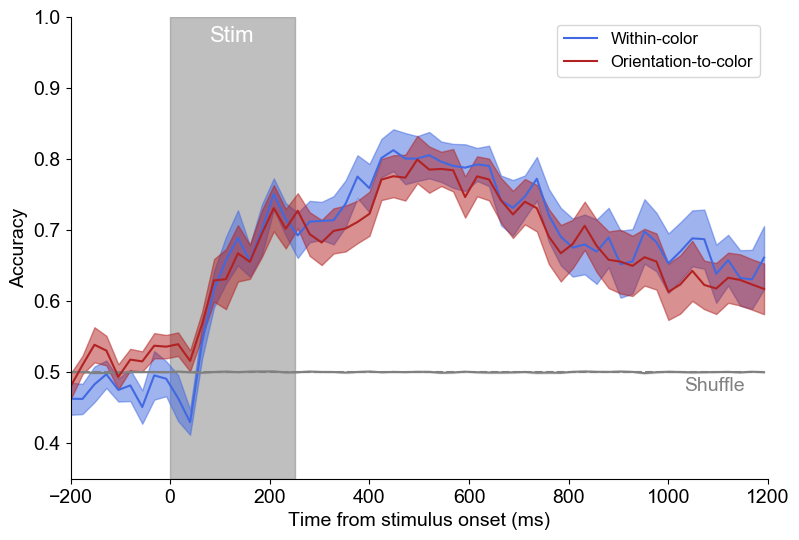

In [36]:
interp_color.plot_acc_compare_subset(
    subset_list=['Within-color','Orientation-to-color'],
    ylim=[.35,1], 
    chance=.5, 
    chance_text_y=.22,
    significance_testing=True,
    subtitle='within_color_and_ori_to_color',
    savefig=True)

## ori

In [23]:
# Combine acc matrices for plotting
interp_ori.acc = np.concatenate([interp_ori.acc[:,np.newaxis],interp_color_to_ori.acc[:,np.newaxis]],1)
interp_ori.acc_shuff = np.concatenate([interp_ori.acc_shuff[:,np.newaxis],interp_color_to_ori.acc_shuff[:,np.newaxis]],1)

Within-orientation mean delay accuracy: 0.7494401960784313
Within-orientation mean delay S.D.: 0.0684695081249174
Color-to-orientation mean delay accuracy: 0.7169116807230138
Color-to-orientation mean delay S.D.: 0.06526271519494878
significant timepoints: []
mean delay accuracy: 0.7169116807230138
mean delay S.D.: 0.06526271519494878


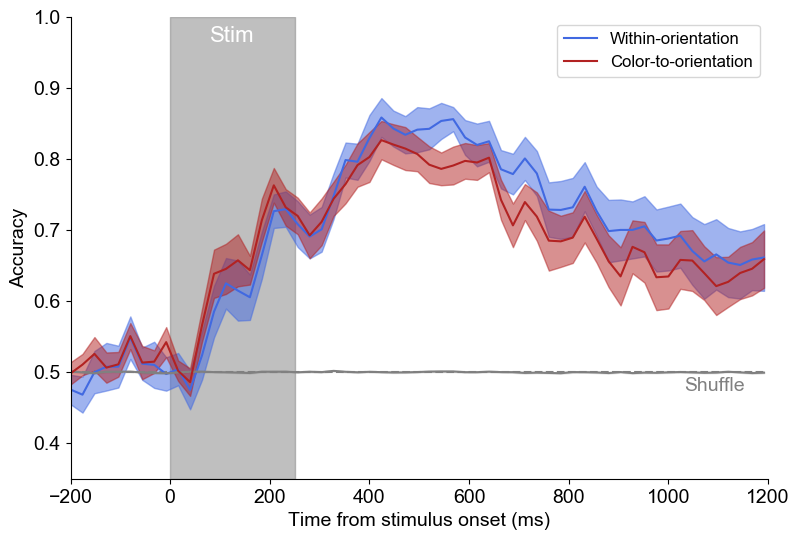

In [38]:
interp_ori.plot_acc_compare_subset(
    subset_list=['Within-orientation','Color-to-orientation'],
    ylim=[.35,1], 
    chance=.5, 
    chance_text_y=.22,
    significance_testing=True,
    subtitle='within_ori_and_color_to_ori',
    savefig=False)